# EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import pickle

## Importar el dataset

In [2]:
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

total_data.to_csv("../data/raw/total_data.csv", index = False)

print(total_data.shape)

total_data.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Eliminación de duplicados e información irrelevante

In [3]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(768, 9)

In [4]:
total_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Análisis de variables univariante

En este caso son todas numéricas: 
- Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
### Numéricas

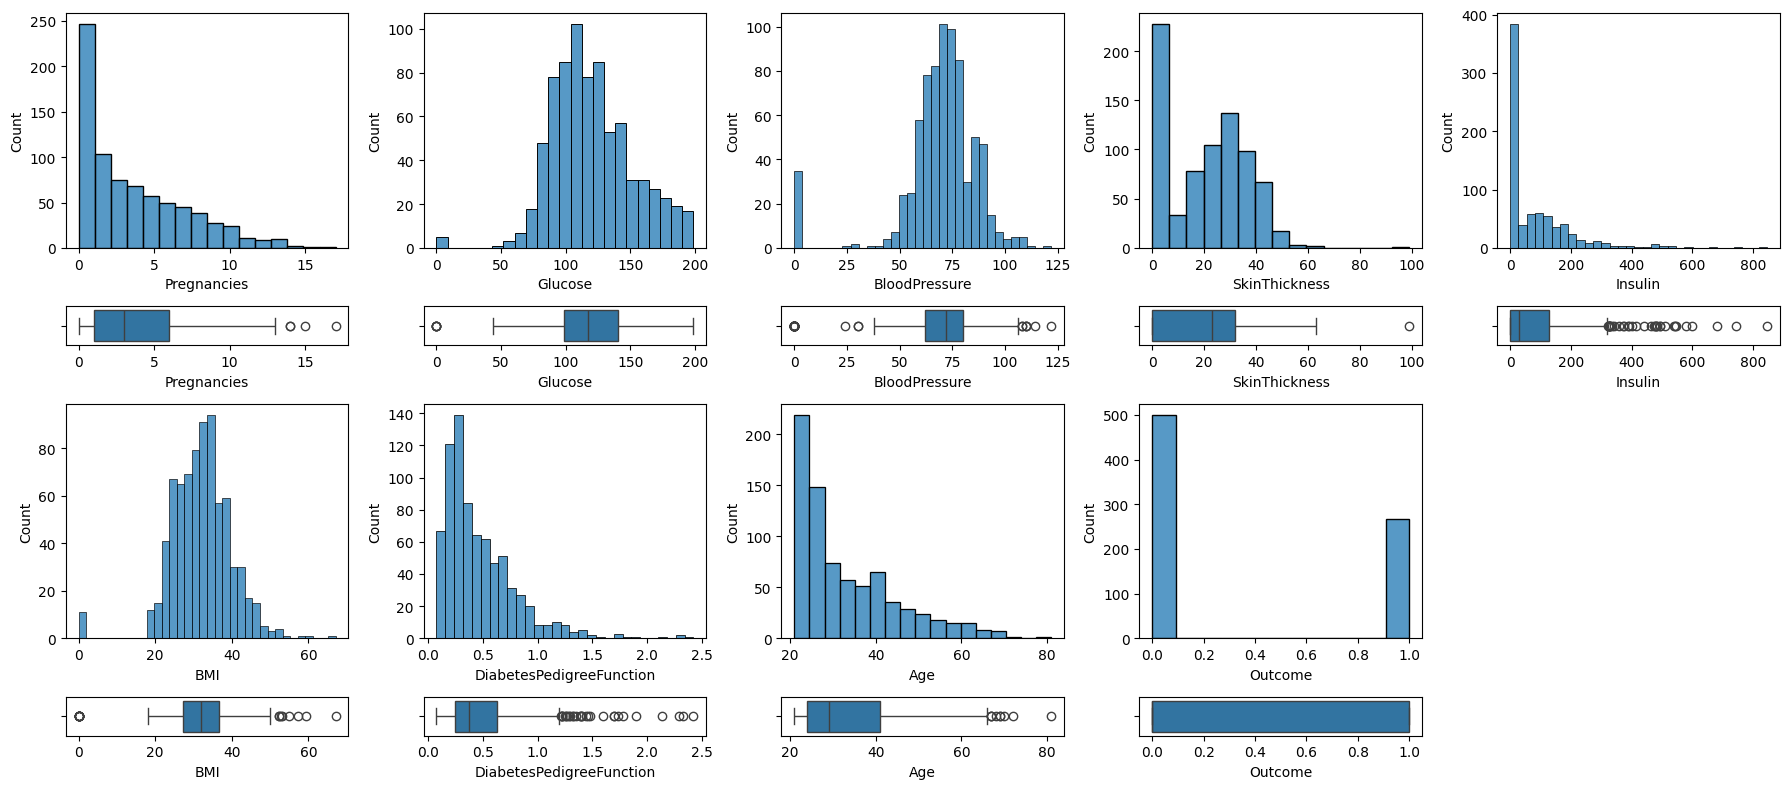

In [6]:
fig, axis = plt.subplots(4, 5, figsize=(18, 8), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[1, 2], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[1, 3], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[0, 4], data=total_data, x="Insulin")
sns.boxplot(ax=axis[1, 4], data=total_data, x="Insulin")

sns.histplot(ax=axis[2, 0], data=total_data, x="BMI")
sns.boxplot(ax=axis[3, 0], data=total_data, x="BMI")

sns.histplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[3, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[2, 2], data=total_data, x="Age")
sns.boxplot(ax=axis[3, 2], data=total_data, x="Age")

sns.histplot(ax=axis[2, 3], data=total_data, x="Outcome")
sns.boxplot(ax=axis[3, 3], data=total_data, x="Outcome")

fig.delaxes(axis[2,4])
fig.delaxes(axis[3,4])

plt.tight_layout()

plt.show()

- `Pregnancies`: el dato más habitual es 0. Hay algunos outliers
- `Glucose`: hay un número considerable de valores 0, lo cual no es posible. Tiene outliers en ambos extremos
- `BloodPressure`: muchos datos valen 0, lo cual es imposible. Tiene outliers a ambos lados.
- `SkinThickness`: muchos 0s, también imposible. 
- `Insulin`:  otra vez muchos 0s.
- `BMI`: algunos 0s y algunos outliers a la derecha
- `DiabetesPedigreeFunction`: muchísimos outliers. Valor más frecuente entre 0'25 y 0'4
- `Age`: La edad más frecuente son los 20 años. Bastantes outliers en edades avanzadas
- `Outcome`: es la target. Hay más negativos (0) que positivo (1)



Vamos a reemplazar esos 0s por datos verosímiles, que en este caso va a ser la mediana de la columna. Separamos entre cuando el target es 0 ó 1 para intentar hacerlo lo más realista posible.

In [7]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


def impute_zeros_by_median_per_outcome(dataset, columns):
    
    df_copy = dataset.copy()

    df_copy[columns] = df_copy[columns].astype(float)

    for col in columns:
        for outcome_val in [0, 1]:
            median_val = df_copy[(df_copy['Outcome'] == outcome_val) & (df_copy[col] != 0)][col].median()
            mask = (df_copy['Outcome'] == outcome_val) & (df_copy[col] == 0)
            df_copy.loc[mask, col] = median_val
    
    return df_copy

total_data_processed = impute_zeros_by_median_per_outcome(total_data, cols_with_zeros)


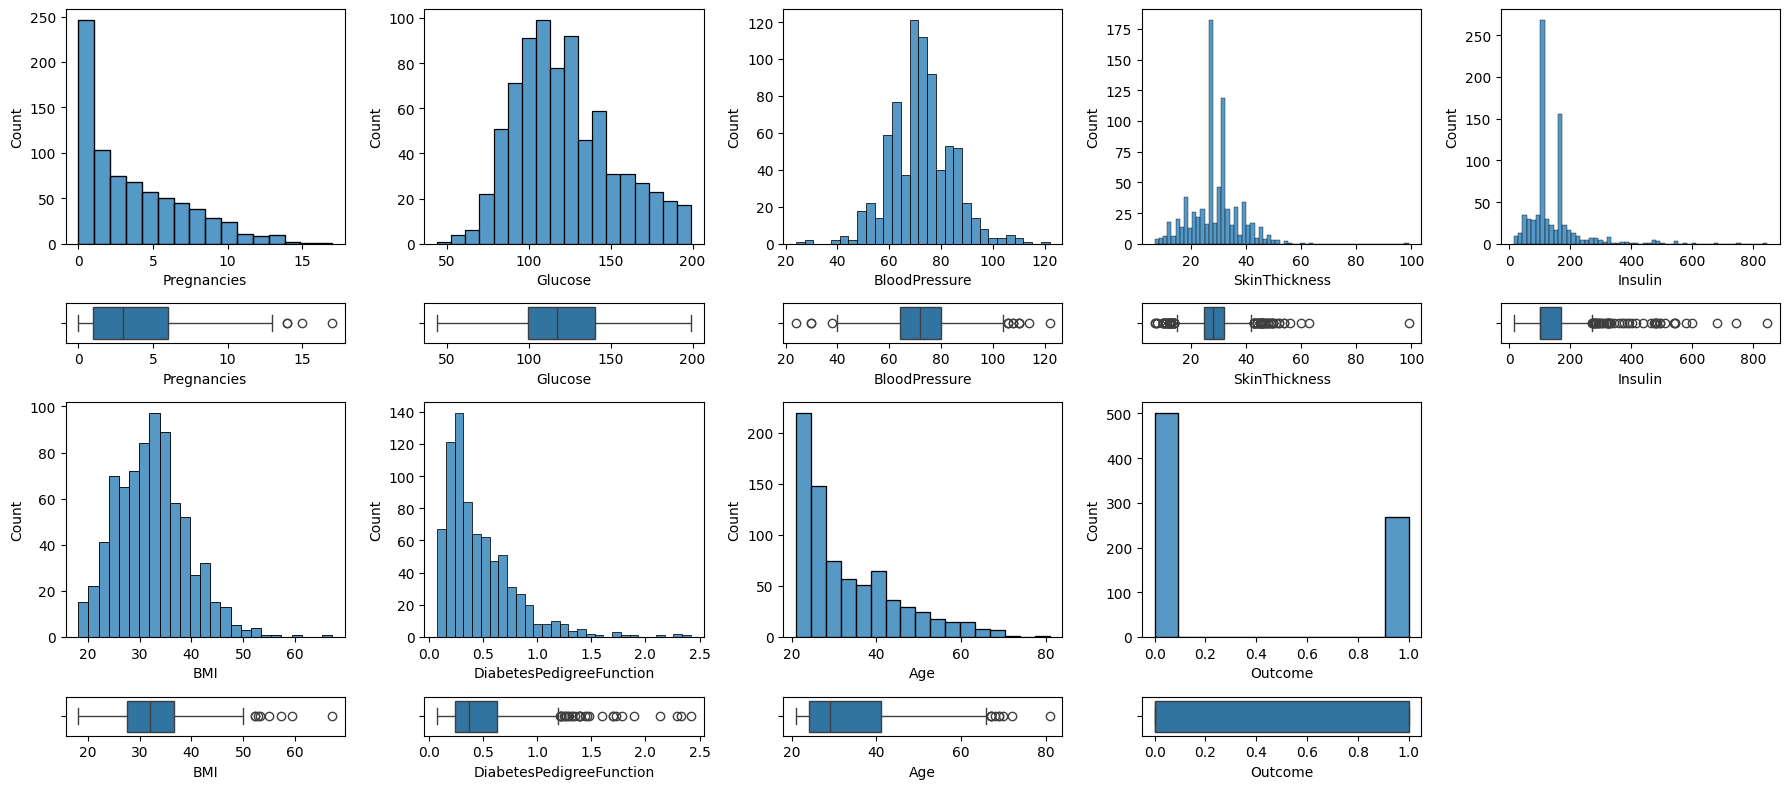

In [8]:
fig, axis = plt.subplots(4, 5, figsize=(18, 8), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax=axis[0, 0], data=total_data_processed, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=total_data_processed, x="Pregnancies")

sns.histplot(ax=axis[0, 1], data=total_data_processed, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data_processed, x="Glucose")

sns.histplot(ax=axis[0, 2], data=total_data_processed, x="BloodPressure")
sns.boxplot(ax=axis[1, 2], data=total_data_processed, x="BloodPressure")

sns.histplot(ax=axis[0, 3], data=total_data_processed, x="SkinThickness")
sns.boxplot(ax=axis[1, 3], data=total_data_processed, x="SkinThickness")

sns.histplot(ax=axis[0, 4], data=total_data_processed, x="Insulin")
sns.boxplot(ax=axis[1, 4], data=total_data_processed, x="Insulin")

sns.histplot(ax=axis[2, 0], data=total_data_processed, x="BMI")
sns.boxplot(ax=axis[3, 0], data=total_data_processed, x="BMI")

sns.histplot(ax=axis[2, 1], data=total_data_processed, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[3, 1], data=total_data_processed, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[2, 2], data=total_data_processed, x="Age")
sns.boxplot(ax=axis[3, 2], data=total_data_processed, x="Age")

sns.histplot(ax=axis[2, 3], data=total_data_processed, x="Outcome")
sns.boxplot(ax=axis[3, 3], data=total_data_processed, x="Outcome")

fig.delaxes(axis[2,4])
fig.delaxes(axis[3,4])

plt.tight_layout()

plt.show()

## Análisis de variables multivariante

### Correlaciones

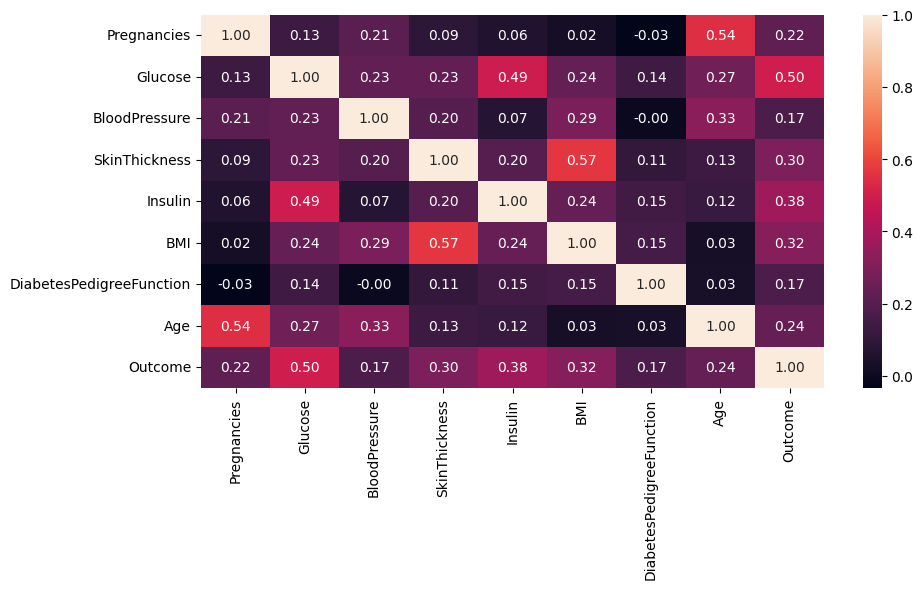

In [9]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_processed[["Pregnancies", "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Como era de esperar, `Glucose` está muy relacionada con el resultado de nuestra target `Outcome`
- El `BMI` está muy relacionado con el `SkinThickness`, al igual que `Glucose` con `Insulin`

### Parallel plot

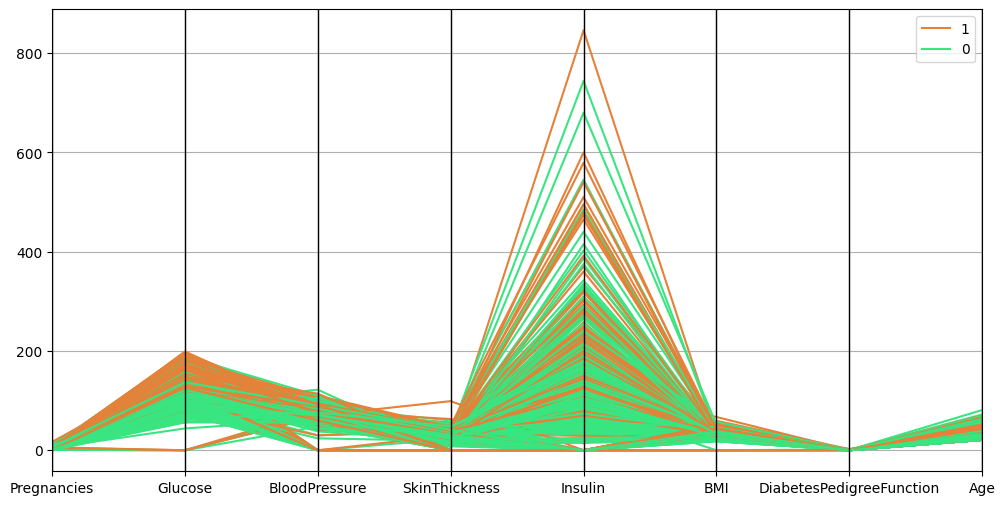

In [10]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

De aquí se extrae de nuevo que `Glucose` e `Insulin` (aunque esta tiene bastante dispersión), es posible que sean los 2 mejores variables para predecir el `Outcome`

In [11]:
total_data_processed.to_csv("../data/raw/total_data_processed.csv", index = False)

## Ingeniería de características

In [12]:
total_data_processed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### División con_outliers y sin_outliers

In [13]:
total_data_con_outliers = total_data_processed.copy()
total_data_sin_outliers = total_data_processed.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr

  if lower_limit < 0:
     lower_limit=float(df[column].min())

  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}

columns_to_process = [col for col in total_data_sin_outliers.columns if col != 'Outcome']

for column in columns_to_process:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

### Escalado de valores

No necesario normalizar ni min-max para decision tree

In [14]:
X_con_outliers = total_data_con_outliers.drop("Outcome", axis = 1)
X_sin_outliers = total_data_sin_outliers.drop("Outcome", axis = 1)
y = total_data_con_outliers["Outcome"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42, stratify=y)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42, stratify=y)

X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

## Selección de características

#### Con outliers

In [23]:
selection_model_con_outliers = SelectKBest(k = 5)
selection_model_con_outliers.fit(X_train_con_outliers, y_train)

selected_columns = X_train_con_outliers.columns[selection_model_con_outliers.get_support()]

X_train_con_outliers_sel = pd.DataFrame(
    selection_model_con_outliers.transform(X_train_con_outliers),
    columns=selected_columns
)

X_test_con_outliers_sel = pd.DataFrame(
    selection_model_con_outliers.transform(X_test_con_outliers),
    columns=selected_columns
)


with open("../models/feature_selection_con_outliers_k_5.json", "w") as f:
    json.dump(X_train_con_outliers_sel.columns.tolist(), f)

X_train_con_outliers_sel.head()

,Glucose,SkinThickness,Insulin,BMI,Age
0,90.0,12.0,43.0,27.2,24.0
1,126.0,27.0,22.0,29.6,40.0
2,105.0,40.0,94.0,34.9,25.0
3,146.0,27.0,102.5,29.7,29.0
4,95.0,39.0,105.0,44.6,22.0


In [24]:
X_train_con_outliers_sel["Outcome"] = y_train.values
X_test_con_outliers_sel["Outcome"] = y_test.values

X_train_con_outliers_sel.to_csv("../data/processed/clean_train_con_outliers.csv", index=False)
X_test_con_outliers_sel.to_csv("../data/processed/clean_test_con_outliers.csv", index=False)

#### Sin outliers

In [25]:
selection_model_sin_outliers = SelectKBest(k = 5)
selection_model_sin_outliers.fit(X_train_sin_outliers, y_train)

selected_columns = X_train_sin_outliers.columns[selection_model_sin_outliers.get_support()]

X_train_sin_outliers_sel = pd.DataFrame(
    selection_model_sin_outliers.transform(X_train_sin_outliers),
    columns=selected_columns
)

X_test_sin_outliers_sel = pd.DataFrame(
    selection_model_sin_outliers.transform(X_test_sin_outliers),
    columns=selected_columns
)


with open("../models/feature_selection_sin_outliers_k_5.json", "w") as f:
    json.dump(X_train_sin_outliers_sel.columns.tolist(), f)

X_test_sin_outliers_sel.head()

,Glucose,SkinThickness,Insulin,BMI,Age
0,159.0,27.0,102.5,27.4,40.0
1,68.0,23.0,49.0,35.5,47.0
2,122.0,27.0,200.0,35.9,26.0
3,114.0,32.0,169.5,27.4,34.0
4,74.0,27.0,102.5,30.1,22.0


In [26]:
X_train_sin_outliers_sel["Outcome"] = y_train.values
X_test_sin_outliers_sel["Outcome"] = y_test.values

X_train_sin_outliers_sel.to_csv("../data/processed/clean_train_sin_outliers.csv", index=False)
X_test_sin_outliers_sel.to_csv("../data/processed/clean_test_sin_outliers.csv", index=False)